In [10]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
cap = cv2.VideoCapture('video.mp4')

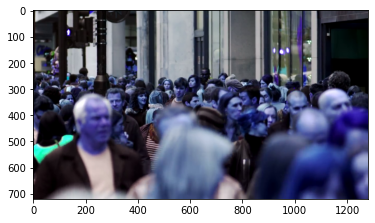

In [22]:
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
 
        # Display the resulting frame
        plt.imshow(frame)
 
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Break the loop
    else:
        break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

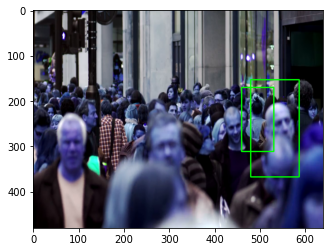

In [24]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

cv2.startWindowThread()

# kalabalıkta yürüyen insanlar videosu
cap = cv2.VideoCapture('video.mp4')

# output output.avi formatında olacaktır
out = cv2.VideoWriter(
    'output.avi',
    cv2.VideoWriter_fourcc(*'MJPG'),
    15.,
    (640,480))

while(True):
    # çerçeve çerçeve okunur
    ret, frame = cap.read()

    # daha hızlı detection işlemi işlemi için boyut küçültülür
    frame = cv2.resize(frame, (640, 480))
    # daha hızlı detection için greyscale picture kullanılır
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # insanlar videodan tanımlanır
    boxes, weights = hog.detectMultiScale(frame, winStride=(8,8) )

    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    for (xA, yA, xB, yB) in boxes:
        # algılanan kutuları renkli resimde görüntüleme
        cv2.rectangle(frame, (xA, yA), (xB, yB),
                          (0, 255, 0), 2)
    
    # output videosunun yazılması
    out.write(frame.astype('uint8'))
    # sonuç çerçevesi
    plt.imshow(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
out.release()
# son olarak pencere kapatılır
cv2.destroyAllWindows()
cv2.waitKey(1)